In [ ]:
# Desativando os avisos sobre as bibliotecas depreciadas:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv("application_train.csv")

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Divisão da base por gênero
df['CODE_GENDER'].value_counts(normalize=True)

F      0.657975
M      0.342013
XNA    0.000012
Name: CODE_GENDER, dtype: float64

In [ ]:
# Divisão dos empréstimos em dinheiro e rotativo

df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         222622
Revolving loans     23386
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
# Quantidade por categoria (ocupação)

df['NAME_INCOME_TYPE'].value_counts()

Working                 126919
Commercial associate     57321
Pensioner                44389
State servant            17337
Unemployed                  17
Student                     12
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
# Quantidade de pessoas  por nível educacional?

df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    174831
Higher education                  59832
Incomplete higher                  8208
Lower secondary                    3004
Academic degree                     133
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
# Renda anual vs tipo de empréstimo

df.groupby("NAME_CONTRACT_TYPE")[["AMT_INCOME_TOTAL"]].mean()

,AMT_INCOME_TOTAL
NAME_CONTRACT_TYPE,
Cash loans,169171.005657
Revolving loans,166448.054325


In [ ]:
# Qual o nível de escolaridade vs renda anual?

df.groupby('NAME_EDUCATION_TYPE')[["AMT_INCOME_TOTAL"]].mean()

,AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE,
Academic degree,243947.368421
Higher education,208705.922872
Incomplete higher,181420.721491
Lower secondary,130203.200732
Secondary / secondary special,155314.402741


In [ ]:
# Quais são os dias da semana com mais empréstimos?

df['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      43046
WEDNESDAY    41418
MONDAY       40709
THURSDAY     40616
FRIDAY       40202
SATURDAY     27083
SUNDAY       12934
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [ ]:
# Pessoas com carro ganham possuem uma maior renda anual média?

df.groupby('FLAG_OWN_CAR')[["AMT_INCOME_TOTAL"]].mean()

,AMT_INCOME_TOTAL
FLAG_OWN_CAR,
N,154737.398085
Y,196422.741011


In [ ]:
# Divisão por dias da semana, nível educacional, renda anual

df.groupby(["WEEKDAY_APPR_PROCESS_START","NAME_EDUCATION_TYPE"])[["AMT_INCOME_TOTAL"]].mean()

AMT_INCOME_TOTAL
WEEKDAY_APPR_PROCESS_START NAME_EDUCATION_TYPE                            
FRIDAY                     Academic degree                   230522.727273
                           Higher education                  208996.834023
                           Incomplete higher                 184028.416476
                           Lower secondary                   128936.885965
                           Secondary / secondary special     155280.966081
MONDAY                     Academic degree                   298530.000000
                           Higher education                  208468.161691
                           Incomplete higher                 180028.145278
                           Lower secondary                   132041.915625
                           Secondary / secondary special     154772.908303
SATURDAY                   Academic degree                   343500.000000
                           Higher education                  206964.879805
                           Incomplete higher                 182136.958960
                           Lower secondary                   128037.915408
                           Secondary / secondary special     153715.560264
SUNDAY                     Academic degree                   168000.000000
                           Higher education                  209676.620924
                           Incomplete higher                 179099.085366
                           Lower secondary                   133800.914634
                           Secondary / secondary special     153447.805282
THURSDAY                   Academic degree                   197750.000000
                           Higher education                  209118.956305
                           Incomplete higher                 184480.590641
                           Lower secondary                   131340.914317
                           Secondary / secondary special     156357.329954
TUESDAY                    Academic degree                   224802.439024
                           Higher education                  207964.457534
                           Incomplete higher                 178435.673630
                           Lower secondary                   127184.866071
                           Secondary / secondary special     157558.286929
WEDNESDAY                  Academic degree                   235323.529412
                           Higher education                  209795.192759
                           Incomplete higher                 180852.938623
                           Lower secondary                   132343.609091
                           Secondary / secondary special     154158.624808

In [ ]:
# Quantidade de pessoas que buscam um empréstimo por dias da semana e ocupação 

df.groupby(["WEEKDAY_APPR_PROCESS_START","OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL"]].count()

AMT_INCOME_TOTAL
WEEKDAY_APPR_PROCESS_START OCCUPATION_TYPE                       
FRIDAY                     Accountants                       1253
                           Cleaning staff                     614
                           Cooking staff                      724
                           Core staff                        3550
                           Drivers                           2349
...                                                           ...
WEDNESDAY                  Realty agents                      112
                           Sales staff                       4477
                           Secretaries                        175
                           Security staff                     899
                           Waiters/barmen staff               185

[126 rows x 1 columns]

In [ ]:
#Qual a renda anual média e a ocupação das pessoas que pedem empréstimos nos dias da semana?

df.groupby(["WEEKDAY_APPR_PROCESS_START","OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL"]].mean()

AMT_INCOME_TOTAL
WEEKDAY_APPR_PROCESS_START OCCUPATION_TYPE                       
FRIDAY                     Accountants              197017.656824
                           Cleaning staff           132715.553746
                           Cooking staff            136581.215470
                           Core staff               173834.819442
                           Drivers                  188848.791188
...                                                           ...
WEDNESDAY                  Realty agents            196754.464286
                           Sales staff              151218.557550
                           Secretaries              150357.188571
                           Security staff           151771.209677
                           Waiters/barmen staff     142285.937838

[126 rows x 1 columns]

In [ ]:
# Estado civil influência na renda anual?

df.groupby(["NAME_FAMILY_STATUS","OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL"]].mean()

AMT_INCOME_TOTAL
NAME_FAMILY_STATUS OCCUPATION_TYPE                       
Civil marriage     Accountants              200086.585714
                   Cleaning staff           131805.851064
                   Cooking staff            139209.372321
                   Core staff               170857.987218
                   Drivers                  184145.207097
...                                                   ...
Widow              Realty agents            171173.076923
                   Sales staff              155682.585176
                   Secretaries              157571.052632
                   Security staff           129339.310345
                   Waiters/barmen staff     145508.823529

[91 rows x 1 columns]

In [ ]:
#Pessoas que possuem casa própria ganham mais que pessoas que não possuem?

df.groupby(["FLAG_OWN_REALTY","OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL"]].mean()

AMT_INCOME_TOTAL
FLAG_OWN_REALTY OCCUPATION_TYPE                        
N               Accountants               190830.968726
                Cleaning staff            123219.231308
                Cooking staff             136351.459623
                Core staff                170978.407706
                Drivers                   184299.566934
                HR staff                  182502.860294
                High skill tech staff     180519.289783
                IT staff                  209665.156425
                Laborers                  163164.639979
                Low-skill Laborers        130918.788991
                Managers                  261755.011946
                Medicine staff            144036.074671
                Private service staff     176823.816311
                Realty agents             191418.750000
                Sales staff               149602.936988
                Secretaries               153979.009615
                Security staff            147259.025246
                Waiters/barmen staff      139883.393130
Y               Accountants               196454.294217
                Cleaning staff            133509.665845
                Cooking staff             138808.141335
                Core staff                173812.496022
                Drivers                   188414.614802
                HR staff                  193161.529412
                High skill tech staff     184262.232371
                IT staff                  218232.632812
                Laborers                  168657.972286
                Low-skill Laborers        134951.495230
                Managers                  259949.855779
                Medicine staff            152489.435693
                Private service staff     183034.583902
                Realty agents             198985.047847
                Sales staff               153451.284984
                Secretaries               163237.179506
                Security staff            151269.694155
                Waiters/barmen staff      146249.159913

In [ ]:
# O tipo de residência influência na renda anual? 

df.groupby(["HOUSETYPE_MODE","OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL"]].mean()

AMT_INCOME_TOTAL
HOUSETYPE_MODE   OCCUPATION_TYPE                        
block of flats   Accountants               207107.670757
                 Cleaning staff            137512.339915
                 Cooking staff             147749.561620
                 Core staff                186895.518096
                 Drivers                   196331.212413
                 HR staff                  200227.195489
                 High skill tech staff     189860.275530
                 IT staff                  229636.208955
                 Laborers                  177567.468019
                 Low-skill Laborers        144656.522609
                 Managers                  277233.075139
                 Medicine staff            163351.130013
                 Private service staff     189660.394133
                 Realty agents             204711.971831
                 Sales staff               161370.520054
                 Secretaries               167945.451923
                 Security staff            160884.908311
                 Waiters/barmen staff      154626.505230
specific housing Accountants               179267.441860
                 Cleaning staff            134391.283784
                 Cooking staff             130024.285714
                 Core staff                164121.264706
                 Drivers                   194200.819672
                 HR staff                  333000.000000
                 High skill tech staff     189970.588235
                 IT staff                  187500.000000
                 Laborers                  162901.595745
                 Low-skill Laborers        157821.428571
                 Managers                  226201.406250
                 Medicine staff            147468.750000
                 Private service staff     171346.153846
                 Realty agents             230625.000000
                 Sales staff               152148.171141
                 Secretaries               122400.000000
                 Security staff            143653.846154
                 Waiters/barmen staff      129750.000000
terraced house   Accountants               208752.428571
                 Cleaning staff            154631.250000
                 Cooking staff             145956.521739
                 Core staff                192818.760000
                 Drivers                   169201.265625
                 HR staff                  139500.000000
                 High skill tech staff     190429.223684
                 IT staff                  157500.000000
                 Laborers                  159752.319588
                 Low-skill Laborers        125500.000000
                 Managers                  298756.097561
                 Medicine staff            144497.833333
                 Private service staff     202500.000000
                 Realty agents             225000.000000
                 Sales staff               161424.764151
                 Secretaries               150750.000000
                 Security staff            126093.750000
                 Waiters/barmen staff      200250.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [ ]:
nulos = df.isnull().sum()
nulos_pct = nulos/df.shape[0]
nulos_pct.describe()

count    122.000000
mean       0.244111
std        0.284655
min        0.000000
25%        0.000000
50%        0.003305
75%        0.508568
max        0.699075
dtype: float64

In [ ]:
nulos_pct[nulos_pct > 0.5].index.tolist()

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [ ]:
df_s_nulos = df.drop(columns = nulos_pct[nulos_pct > 0.5].index.tolist()).copy()

In [ ]:
df_s_nulos

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_s_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    246008 non-null  int64  
 1   TARGET                        246008 non-null  int64  
 2   NAME_CONTRACT_TYPE            246008 non-null  object 
 3   CODE_GENDER                   246008 non-null  object 
 4   FLAG_OWN_CAR                  246008 non-null  object 
 5   FLAG_OWN_REALTY               246008 non-null  object 
 6   CNT_CHILDREN                  246008 non-null  int64  
 7   AMT_INCOME_TOTAL              246008 non-null  float64
 8   AMT_CREDIT                    246008 non-null  float64
 9   AMT_ANNUITY                   245998 non-null  float64
 10  AMT_GOODS_PRICE               245782 non-null  float64
 11  NAME_TYPE_SUITE               244960 non-null  object 
 12  NAME_INCOME_TYPE              246008 non-nul

In [ ]:
df_nulos= df_s_nulos.isnull().sum()/df_s_nulos.shape[0]

df_nulos

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.134841
AMT_REQ_CREDIT_BUREAU_WEEK    0.134841
AMT_REQ_CREDIT_BUREAU_MON     0.134841
AMT_REQ_CREDIT_BUREAU_QRT     0.134841
AMT_REQ_CREDIT_BUREAU_YEAR    0.134841
Length: 81, dtype: float64

In [ ]:
df_nulos[df_nulos>0].sort_values(ascending=False)

FLOORSMAX_MEDI                  0.497882
FLOORSMAX_AVG                   0.497882
FLOORSMAX_MODE                  0.497882
YEARS_BEGINEXPLUATATION_AVG     0.488179
YEARS_BEGINEXPLUATATION_MODE    0.488179
YEARS_BEGINEXPLUATATION_MEDI    0.488179
TOTALAREA_MODE                  0.483062
EMERGENCYSTATE_MODE             0.474623
OCCUPATION_TYPE                 0.313961
EXT_SOURCE_3                    0.198075
AMT_REQ_CREDIT_BUREAU_QRT       0.134841
AMT_REQ_CREDIT_BUREAU_YEAR      0.134841
AMT_REQ_CREDIT_BUREAU_HOUR      0.134841
AMT_REQ_CREDIT_BUREAU_DAY       0.134841
AMT_REQ_CREDIT_BUREAU_WEEK      0.134841
AMT_REQ_CREDIT_BUREAU_MON       0.134841
NAME_TYPE_SUITE                 0.004260
OBS_30_CNT_SOCIAL_CIRCLE        0.003305
DEF_30_CNT_SOCIAL_CIRCLE        0.003305
OBS_60_CNT_SOCIAL_CIRCLE        0.003305
DEF_60_CNT_SOCIAL_CIRCLE        0.003305
EXT_SOURCE_2                    0.002211
AMT_GOODS_PRICE                 0.000919
AMT_ANNUITY                     0.000041
DAYS_LAST_PHONE_

In [ ]:
df_s_nulos = df.drop(columns = nulos_pct[nulos_pct > 0.47].index.tolist()).copy()
df_s_nulos

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_nulos[df_nulos>0].sort_values(ascending=False)

FLOORSMAX_MEDI                  0.497882
FLOORSMAX_AVG                   0.497882
FLOORSMAX_MODE                  0.497882
YEARS_BEGINEXPLUATATION_AVG     0.488179
YEARS_BEGINEXPLUATATION_MODE    0.488179
YEARS_BEGINEXPLUATATION_MEDI    0.488179
TOTALAREA_MODE                  0.483062
EMERGENCYSTATE_MODE             0.474623
OCCUPATION_TYPE                 0.313961
EXT_SOURCE_3                    0.198075
AMT_REQ_CREDIT_BUREAU_QRT       0.134841
AMT_REQ_CREDIT_BUREAU_YEAR      0.134841
AMT_REQ_CREDIT_BUREAU_HOUR      0.134841
AMT_REQ_CREDIT_BUREAU_DAY       0.134841
AMT_REQ_CREDIT_BUREAU_WEEK      0.134841
AMT_REQ_CREDIT_BUREAU_MON       0.134841
NAME_TYPE_SUITE                 0.004260
OBS_30_CNT_SOCIAL_CIRCLE        0.003305
DEF_30_CNT_SOCIAL_CIRCLE        0.003305
OBS_60_CNT_SOCIAL_CIRCLE        0.003305
DEF_60_CNT_SOCIAL_CIRCLE        0.003305
EXT_SOURCE_2                    0.002211
AMT_GOODS_PRICE                 0.000919
AMT_ANNUITY                     0.000041
DAYS_LAST_PHONE_

In [ ]:
df_s_nulos = df_s_nulos.drop(columns=['OCCUPATION_TYPE','EXT_SOURCE_3'])

In [ ]:
df_s_nulos

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Para substituir os valores de NaN pelos valores da linha anterior:

df3= df_s_nulos.fillna(axis=0, method='ffill')

In [ ]:
df3.isnull().sum()/df3.shape[0]

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 71, dtype: float64

In [ ]:
# Os modelos foram utilizados com as features numéricas

df3 = df3.select_dtypes(include=np.number)

df3

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,0,112500.0,700830.0,22738.5,585000.0,0.019689,-8676,-813,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,0,90000.0,375322.5,14422.5,324000.0,0.025164,-13583,-223,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,0,180000.0,544491.0,16047.0,454500.0,0.035792,-13993,-6202,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,0,270000.0,814041.0,28971.0,679500.0,0.046220,-22425,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,0,144000.0,675000.0,21906.0,675000.0,0.026392,-18839,-2763,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,1,270000.0,1172470.5,34411.5,918000.0,0.035792,-15992,-4333,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,0,180000.0,654498.0,27859.5,585000.0,0.003122,-23798,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,1,112500.0,270000.0,13500.0,270000.0,0.011657,-14793,-1982,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246006,236776,1,3,202500.0,204858.0,17653.5,171000.0,0.016612,-14418,-2840,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# check dos dados nulos

df3.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_2                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT

<AxesSubplot:>

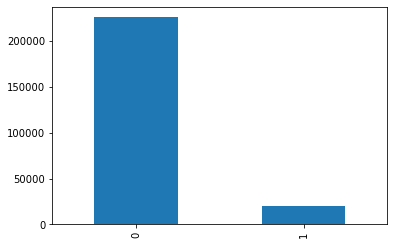

In [ ]:
# Check do balenceamento do target
df['TARGET'].value_counts().plot.bar()

In [ ]:
classifiers = {'Logistic Regression' : LogisticRegression(),
               'KNN': KNeighborsClassifier(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'AdaBoost': AdaBoostClassifier()}

samplers = {'Random_under_sampler': RandomUnderSampler(),
            'Random_over_sampler': RandomOverSampler()}


In [ ]:
def df_split(df, target='TARGET'):
    df = df.fillna(999)
    x = df.drop('TARGET', axis=1)
    y = df['TARGET']    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)                          
    return x_train, x_test, y_train, y_test

def train_clfs(df, classifiers, samplers):
    
    x_train, x_test, y_train, y_test = df_split(df)
    
    names_samplers = []
    names_clfs = []
    results_train_cv_roc_auc = []
    results_train_cv_recall = []
    results_train_cv_accuracy = []
    results_test_roc_auc = []
    results_test_recall = []
    results_test_accuracy = []
    modelos = []
    
    for name_sampler, sampler in samplers.items():
        print(f'Sampler: {name_sampler}\n')
        for name_clf, clf in classifiers.items():
            print(f'Classifier: {name_clf}\n')
            
            pipeline = Pipeline([('sampler', sampler),
                                 ('clf', clf)])
            
            cv_auc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='roc_auc') 
            cv_rec = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='recall')                                
            cv_acc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')        

            pipeline.fit(x_train, y_train)
            modelos.append(pipeline)
            y_pred = pipeline.predict(x_test)
            
            names_samplers.append(name_sampler)
            names_clfs.append(name_clf)
            results_train_cv_roc_auc.append(cv_auc)
            results_train_cv_recall.append(cv_rec)
            results_train_cv_accuracy.append(cv_acc)
            results_test_roc_auc.append(roc_auc_score(y_test, y_pred))
            results_test_recall.append(recall_score(y_test, y_pred))
            results_test_accuracy.append(accuracy_score(y_test, y_pred))

            print(f'CV\t-\troc_auc:\t{round(cv_auc.mean(), 3)}')
            print(f'CV\t-\trecall:\t\t{round(cv_rec.mean(), 3)}')
            print(f'CV\t-\taccuracy:\t{round(cv_acc.mean(), 3)}')

            print(f'Test\t-\troc_auc:\t{round(roc_auc_score(y_test, y_pred), 3)}')         
            print(f'Test\t-\trecall:\t\t{round(recall_score(y_test, y_pred), 3)}')          
            print(f'Test\t-\taccuracy:\t{round(accuracy_score(y_test, y_pred), 3)}')      
            print('\n<-------------------------->\n')

    df_results_test = pd.DataFrame(index=[names_clfs, names_samplers], columns=['ROC_AUC', 'RECALL', 'ACCURACY'])
    df_results_test['ROC_AUC'] = results_test_roc_auc
    df_results_test['RECALL'] = results_test_recall
    df_results_test['ACCURACY'] = results_test_accuracy

    return df_results_test, modelos

In [ ]:
df_results_test, modelos_pipeline = train_clfs(df3, classifiers, samplers)

Sampler: Random_under_sampler

Classifier: Logistic Regression

CV	-	roc_auc:	0.607
CV	-	recall:		0.561
CV	-	accuracy:	0.593
Test	-	roc_auc:	0.571
Test	-	recall:		0.551
Test	-	accuracy:	0.588

<-------------------------->

Classifier: KNN

CV	-	roc_auc:	0.548
CV	-	recall:		0.549
CV	-	accuracy:	0.53
Test	-	roc_auc:	0.536
Test	-	recall:		0.536
Test	-	accuracy:	0.536

<-------------------------->

Classifier: Decision Tree

CV	-	roc_auc:	0.558
CV	-	recall:		0.559
CV	-	accuracy:	0.557
Test	-	roc_auc:	0.556
Test	-	recall:		0.556
Test	-	accuracy:	0.556

<-------------------------->

Classifier: Random Forest

CV	-	roc_auc:	0.689
CV	-	recall:		0.617
CV	-	accuracy:	0.658
Test	-	roc_auc:	0.638
Test	-	recall:		0.614
Test	-	accuracy:	0.659

<-------------------------->

Classifier: AdaBoost

CV	-	roc_auc:	0.694
CV	-	recall:		0.635
CV	-	accuracy:	0.644
Test	-	roc_auc:	0.647
Test	-	recall:		0.633
Test	-	accuracy:	0.658

<-------------------------->

Sampler: Random_over_sampler

Classifier: Logisti

In [ ]:
modelos_pipeline

[Pipeline(steps=[('sampler', RandomUnderSampler()),
                 ('clf', LogisticRegression())]),
 Pipeline(steps=[('sampler', RandomUnderSampler()),
                 ('clf', KNeighborsClassifier())]),
 Pipeline(steps=[('sampler', RandomUnderSampler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('sampler', RandomUnderSampler()),
                 ('clf', RandomForestClassifier())]),
 Pipeline(steps=[('sampler', RandomUnderSampler()),
                 ('clf', AdaBoostClassifier())]),
 Pipeline(steps=[('sampler', RandomOverSampler()),
                 ('clf', LogisticRegression())]),
 Pipeline(steps=[('sampler', RandomOverSampler()),
                 ('clf', KNeighborsClassifier())]),
 Pipeline(steps=[('sampler', RandomOverSampler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('sampler', RandomOverSampler()),
                 ('clf', RandomForestClassifier())]),
 Pipeline(steps=[('sampler', RandomOverSampler()),
               

In [ ]:
df_teste = pd.read_csv("application_test_student.csv")

In [ ]:
modelo_final = modelos_pipeline[8]

df4 = df3.drop(columns=['TARGET'])

teste_s_na = df_teste[df4.columns].dropna()

pred_proba = modelo_final.predict_proba(teste_s_na)

In [ ]:
df_resposta = pd.DataFrame()

df_resposta['SK_ID_CURR'] = teste_s_na['SK_ID_CURR']

df_resposta['PROB_INADIMPLENCIA'] = pred_proba[:,1]

In [ ]:
df_resposta

,SK_ID_CURR,PROB_INADIMPLENCIA
0,149741,0.22
1,363290,0.11
3,377703,0.05
4,188624,0.11
5,454397,0.09
...,...,...
61496,434002,0.04
61497,338324,0.04
61499,343961,0.07
61500,427828,0.00


In [ ]:
df_resposta.to_csv('predicoes')